<a href="https://colab.research.google.com/github/vbaezfortunato/Python_class/blob/master/Hoja_de_trabajo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hoja de Trabajo #4

## Problema 1
Para este problema debera hacer analisis de sentimientos para un conjunto de reviews de Yelp, debera mostrar las siguientes metricas sobre el conjunto de reviews:

1. Mostrar el porcentaje de comentarios positivos y comentarios negativos en una misma grafica
2. Mostrar una grafica tipo boxplot para la distribucion de los resultados de la polaridad y lasubjetividad
3. Debera realizar un analisis estadistico con comentarios sobre los resultados de sus hallazgos a partir de las graficas anteriores.

In [49]:
import requests
import re
import pandas as pd
import html as ht
import matplotlib.pyplot as plt
import urllib.request as urllib2

In [2]:
def Reviews(url):
    initText = '<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">' 
    endText = '</span>'
    response = requests.get(url)
    reviews = []
    reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
    page = 20
    while response.status_code == 200 and len(reviews_temp) > 0:
        reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
        for i in range(len(reviews_temp)):
            reviews.append(reviews_temp[i])
        response = requests.get(url + '?start=' + str(page))
        page += 20
        print(page)
    return reviews

In [3]:

reviewspatron = Reviews("https://www.yelp.com/biz/el-patron-restaurante-mexicano-orlando")

40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300


In [4]:
def removerFormatoHTML(reviews):
    for index, review in enumerate(reviews):
        review = ht.unescape(review)
        reviews[index] = review
    return reviews

In [5]:
reviewspatron[120]

'Our family went for lunch buffet. 9.99 for adults, 6.99 for kids weekdays 11:30-2:30. Plenty of choices of meet and shells. My husband loved the queso. Steak fajitas are perfect. We used our Orlando kids eat free card with no problems. We would recommend. <br><br>3rd year coming here. Prices went up but still worth it!'

In [6]:

reviewspatron = removerFormatoHTML(reviewspatron)

In [7]:
Total = pd.DataFrame(reviewspatron,columns=['reviews'])
Total.head()

,reviews
0,We were trying to find something that we could...
1,El Patron is our favorite restaurant in the Or...
2,Ok. So a lot of the reviews here are for the a...
3,Fresh made corn and flour tortillas. Crazy goo...
4,I was traveling for work and staying in the La...


In [8]:
def cleanReviews(listReviews):
    listaReviews = listReviews.str.replace('<br>','')
    listaReviews = listReviews.str.replace('<br><br>','')
    listaReviews = listReviews.str.replace('&#39;',"'")
    listaReviews = listReviews.str.replace(u'\xa0'," ")
    listReviews = listReviews.str.lower()
    listReviews = listReviews.str.rstrip('\n')
    return listReviews

In [9]:
Total['reviews']=cleanReviews(Total['reviews'])
Total.head()

,reviews
0,we were trying to find something that we could...
1,el patron is our favorite restaurant in the or...
2,ok. so a lot of the reviews here are for the a...
3,fresh made corn and flour tortillas. crazy goo...
4,i was traveling for work and staying in the la...


In [10]:
Total['reviews'][120]

'our family went for lunch buffet. 9.99 for adults, 6.99 for kids weekdays 11:30-2:30. plenty of choices of meet and shells. my husband loved the queso. steak fajitas are perfect. we used our orlando kids eat free card with no problems. we would recommend. <br><br>3rd year coming here. prices went up but still worth it!'

## Comenzando el analisis de sentimiento

In [11]:
from textblob import TextBlob

In [27]:
def Sentimientos(allReviews, translate = False):
    polarities = []
    subjs = []
    label = []
    opinion = []

    for review in allReviews:
        sentimiento = TextBlob(review)
        if translate:
            sentimiento = sentimiento.translate(from_lang='en', to='es')
        polarities.append(sentimiento.polarity)
        subjs.append(sentimiento.subjectivity)
        
        #Identificacion tipo de review segun polaridad
        if (sentimiento.polarity > 0):
            label.append('positivo')
        elif (sentimiento.polarity < 0):
            label.append('negativo')
        else:
            label.append('neutro')
        
        #Identificacion tipo de review segun subjetividad
        if (sentimiento.subjectivity > 0.5):
            opinion.append('subjetivo')
        elif (sentimiento.subjectivity <= 0.5):
            opinion.append('objetivo')
        
    dataOut = pd.DataFrame({'polaridad':polarities, 'subje':subjs, 'etiqueta':label, 'tipo opinion':opinion})
    dataOut.head()

    return dataOut

In [13]:
Analisis = Sentimientos(Total['reviews'])
Analisis.head()

,polaridad,subje,etiqueta,tipo opinion
0,0.322879,0.575238,positivo,subjetivo
1,0.416141,0.497222,positivo,objetivo
2,0.211522,0.521429,positivo,subjetivo
3,0.260417,0.457639,positivo,objetivo
4,0.175000,0.414153,positivo,objetivo


In [14]:
Polaridad1=Analisis.etiqueta.value_counts()
Polaridad1

positivo    1181
negativo      98
neutro         2
Name: etiqueta, dtype: int64

In [15]:

Subjetividad1=Analisis["tipo opinion"].value_counts()
Subjetividad1

subjetivo    977
objetivo     304
Name: tipo opinion, dtype: int64

In [16]:
def Pie(polaridad, titulo):
    plt.pie(polaridad.values[0:2], 
        explode=(0.1, 0),
        labels=polaridad.keys()[0:2],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)

    plt.axis('equal')
    plt.title(titulo)
    plt.show()

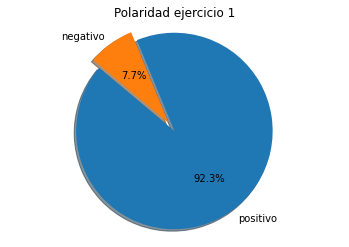

In [17]:
Pie(Polaridad1, 'Polaridad ejercicio 1')

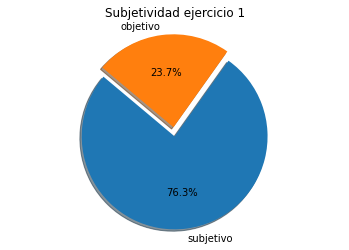

In [18]:
Pie(Subjetividad1, 'Subjetividad ejercicio 1')

{'boxes': [<matplotlib.lines.Line2D at 0x7f78beb446a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78beb42b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f78beb3fac8>,
 'means': [<matplotlib.lines.Line2D at 0x7f78beb3feb8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f78beb42320>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f78beb44320>,
  <matplotlib.lines.Line2D at 0x7f78beb3bcc0>]}

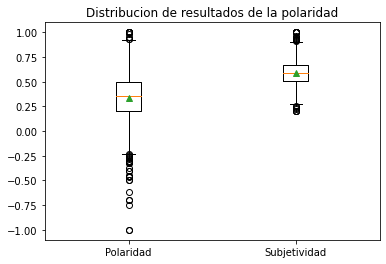

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribucion de resultados de la polaridad')
ax1.boxplot([Analisis['polaridad'], Analisis['subje']], labels = ['Polaridad','Subjetividad'],showmeans=True)

**Conclusion:**

El Patron Restaurante Mexicano tiene un procentaje abrumador de comentarios positivos, 92.2%. Sin embargo practicamente un 76% de estos comentarios fueron subjetivos. 


## Problem 2

Cree un web scraper para los reviews del sitio Trip Advisor, similar al demo trabajado durante la clase #8. Desarrolle un programa que le permita aplicar el analisis de sentimientos desarrollado por su persona en el ejercicio anterior, debera analizar el codigo HTML para poder realizar exitosamente el web scraper.

Para el caso de Trip Advisor, podra notar que la URL se modifica por medio de un parametro llamado or-X donde X es el indice inicial de cada review. En Trip Advisor, los reviews estan organizados en multiplos de 5. A continuacion se le muestra una URL y el parametro de configuracion mencionado:

https://www.tripadvisor.com/Hotel_Review-g34515-d1197260-Reviews-Holiday_Inn_Express_Hotel_Suites_Orlando_International_Drive-Orlando_Florida.html

In [56]:
def Reviews_TripAdvisor(url1, url2):
    initText = '<q class="IRsGHoPm"><span>' 
    endText = '</span></q>'
    response = requests.get(url1+url2)
    reviews = []
    reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
    page = 5
    while response.status_code == 200 and len(reviews_temp) > 0:
        reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
        for i in range(len(reviews_temp)):
            reviews.append(reviews_temp[i])
        response = requests.get(url1 + '-or' + str(page) + url2)
        page += 5
        print(page)
    return reviews

In [58]:
urlPart1="https://www.tripadvisor.com.mx/Hotel_Review-g295366-d1746674-Reviews"
urlPart2="-Mil_Flores_Luxury_Design_Hotel-Antigua_Sacatepequez_Department.html"

In [60]:
reviewsHotel = Reviews_TripAdvisor(urlPart1,urlPart2)

10
15
20
25
30
35
40
45
50
55


KeyboardInterrupt: ignored

In [61]:
reviewsHotel = removerFormatoHTML(reviewsHotel)

In [62]:
Total2 = pd.DataFrame(reviewsHotel,columns=['reviews'])
Total2.head()

,reviews
0,"Me gustó mucho el lugar!!! muy bonito,un espac..."
1,"Nos hospedamos el 24 de diciembre, el lugar es..."
2,"Me encantaron las instalaciones, excelente la ..."
3,Lugar muy especial con habitaciones de lujo y ...
4,Con mi esposa pasamos un fin de semana en el h...


In [63]:
Total2['reviews']=cleanReviews(Total2['reviews'])
Total2.head()

,reviews
0,"me gustó mucho el lugar!!! muy bonito,un espac..."
1,"nos hospedamos el 24 de diciembre, el lugar es..."
2,"me encantaron las instalaciones, excelente la ..."
3,lugar muy especial con habitaciones de lujo y ...
4,con mi esposa pasamos un fin de semana en el h...


In [66]:
AnalisisHotel = Sentimientos(Total2['reviews'], True)
AnalisisHotel.head()

HTTPError: ignored